# 傅里叶变换

# 1. 傅里叶变换简介

① 我们生活在时间的世界中，早上7:00起来吃早饭，8:00去挤地铁，9:00开始上班。。。以时间为参照就是时域分析。

② 但是在频域中一切都是静止的！( 每天都吃早饭，每个工作日都挤地铁。。。频域更关心做这件事的频率是多少。)

参考文献：https://zhuanlan.zhihu.com/p/19763358

# 2. 傅里叶变换作用

① 高频：变化剧烈的灰度分量，例如边界礁石。

② 低频：变化缓慢的灰度分量，例如一片大海。

③ 高通滤波器：只保留高频，会使得图像细节增强。高频边界锐化了，增强了，细节更明显了。

④ 低通滤波器：只保留低频，会使得图像模糊。低频信息保留下来了，高频信息没了，图像边界会变得模糊了。

① opencv 中主要就是 cv2.dft() 执行傅里叶变换到频域中 和 cv2.idft() 执行逆傅里叶变换，输入图像需要先转换成 np.float32 格式。

② 得到的结果中频率为 0 的部分会在左上角，通常要转换到中心位置，可以通过 shift 变换来实现。

③ cv2.dft() 返回的结果是双通道的 ( 实部，虚部 )，通常还需要转换成图像格式才能展示(0,255)像素值。

# 3. 傅里叶变换

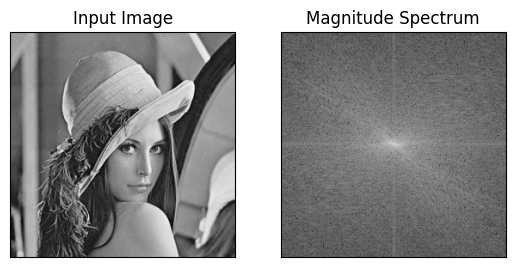

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('01_Picture/13_Lena.jpg',0)
img_float = np.float32(img) # 输入图片转换成 np.float32 格式
dft = cv2.dft(img_float, flags = cv2.DFT_COMPLEX_OUTPUT) # 傅里叶变换
dft_shift = np.fft.fftshift(dft) # 将低频值，频率为 0 的部分转换到中间的位置

# 得到灰度图能表示的形式
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) # 对两个通道进行转换才能得到图像形式表达，由于转换后的值为非常小的数值，因此还要转换到 0-255 之间        
plt.subplot(121), plt.imshow(img,cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([]) # 越往中心频率越低(被 shift 拉到中间)，越往两侧频率越高
plt.show()

(Text(0.5, 1.0, 'Result'), ([], []), ([], []))

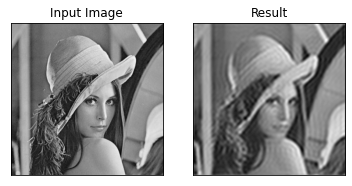

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('01_Picture/13_Lena.jpg',0)
img_float32 = np.float32(img)

# DFT ( 傅里叶变换 )
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2) # 中心位置

# 低通滤波
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30] = 1 # 只保留中心点周围的区域，中心点为最低频的

# IDPT (傅里叶逆变换)
fshift = dft_shift * mask # 用掩码提取 dft_shift 中相应区域，是 1 就保留，不是 1 就过滤了
f_ishift = np.fft.ifftshift(fshift) # 把拉到中心位置的频谱区域给还原回去，依旧回到左上角
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1]) # 将实部和虚部结合起来，才能将傅里叶变换的结果显示出来  

plt.subplot(121),plt.imshow(img,cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back,cmap='gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Result'), ([], []), ([], []))

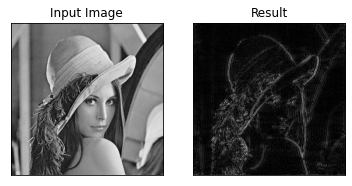

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('01_Picture/13_Lena.jpg',0)
img_float32 = np.float32(img)

dft = cv2.dft(img_float32,flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2) # 中心位置

# 高通滤波
mask = np.ones((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30] = 0 # 中间区域置 0，外面的区域置 1

# IDFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Input Image'), plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(img_back,cmap='gray')
plt.title('Result'),plt.xticks([]),plt.yticks([])